In [3]:
import numpy as np
from matplotlib import pyplot
import math

In [4]:
data = np.loadtxt("realestate.txt", delimiter = ";")
x, y = data[:,1:], data[:,0]
m = y.size
print(y)

In [5]:
def plotMyData(x, y):
    fig = pyplot.figure()
    pyplot.plot(x,y, 'bo', ms=7)
    pyplot.ylabel("Cost of house")
    pyplot.xlabel("Square footage of house")

In [6]:
def normalize(X):
    new_arrays = []
    averages = []
    stand_devs = []
    for edit_array in X.T:
        ave = np.average(edit_array)
        averages.append(ave)
        std = np.std(edit_array)
        stand_devs.append(std)
        edit_array = np.subtract(edit_array, ave)
        edit_array = np.divide(edit_array, std)
        new_arrays.append(edit_array)
    
    return_array = np.array([np.ones(m), new_arrays[0]]).T
    for i in range(1,len(new_arrays)):
        return_array = np.append(return_array, np.array([new_arrays[i], np.ones(m)]).T, axis = 1)[:,:-1]
    return return_array, averages, stand_devs
        
        

In [7]:
#If your data is weird and causes runaways, try normalizing it!
x, aves, stds = normalize(x)
print(x)

In [8]:
#RUN THIS ONLY ONCE!!!!!
# No need to run if you're normalizing
# x = np.stack([np.ones(m), x], axis=1)
stack_array = np.array([np.ones(m), np.ones(m)]).T
x = np.append(stack_array, x, axis =1)[:,1:]
print(x)

32.072733877455654


In [13]:
def costFunction(X, Y, theta):
    cost = 0
    for i in range(0, m):
        cost += ((theta[0] + (theta[1] * X[i, 1]))-Y[i])**2
    cost *= 1/(2*m)
    
    # Vectorized approach
    cost = (1/(2*m))*np.sum((X.dot(theta.T) - y)**2)
    
    return cost

In [18]:
theta = np.array([float(0), float(0), float(0), float(0)])
print(costFunction(x,y,theta))

[-3.89578088  1.19303364]


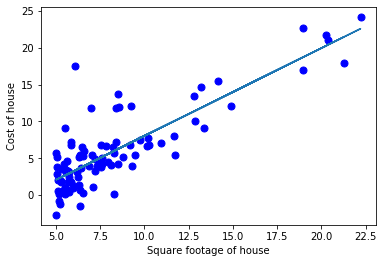

In [19]:
def gradientDescent(X, Y, theta, alpha, num_iters):
    """
    for L in range(num_iters):
        new_theta = theta
        for j in range(0, len(theta)):
            sumpart = 0
            for i in range(0, m):
                sumpart += ((theta[0] + (theta[1] * X[i, 1]))-Y[i]) * X[i, j]
            sumpart = sumpart * alpha * (1/m)
            new_theta[j] -= sumpart
    """ 
    
    #Vectorized
    for i in range(num_iters):
        """
        if i%10 == 0:
            print(theta)
        if i%100 == 0:
            print("(" + str(i/num_iters) + '%)')
        """
        J = (alpha/m)*((X.dot(theta.T) - Y).dot(X))
        theta -= J
        
    return theta

In [ ]:
#Test Gradient Descent
theta = np.array([float(0), float(0), float(0), float(0)])
num_iters = 1500000
alpha = .01

print(gradientDescent(x, y, theta, alpha, num_iters))

In [ ]:
print("Cost: " + str(costFunction(x, y, theta)))
print("Averages:" + str(aves))
print("Deviations: " +str(stds))

plotMyData(x[:,1], y)
pyplot.plot(x[:,1], np.dot(x, theta), '-')
pyplot.ylabel("Cost of house")
pyplot.xlabel("Number of bedrooms in house")

plotMyData(x[:,2], y)
pyplot.plot(x[:,2], np.dot(x, theta), '-')
pyplot.ylabel("Cost of house")
pyplot.xlabel("Number of bathrooms in house")

plotMyData(x[:,3], y)
pyplot.plot(x[:,3], np.dot(x, theta), '-')
pyplot.ylabel("Cost of house")
pyplot.xlabel("Square footage of house")